In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
shuffled_dataset=pd.read_csv('data/ptbdb_shuffled.csv',header=None)
shuffled_dataset

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.504867,0.178456,0.000000,0.027904,0.199870,0.273848,0.298507,0.309539,0.338741,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.700615,0.211077,0.019077,0.000000,0.069846,0.112000,0.154462,0.183692,0.197846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.917616,0.863278,0.737949,0.592463,0.458370,0.387379,0.318142,0.236635,0.213848,0.199825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.000000,0.814891,0.392968,0.000000,0.124785,0.197863,0.242330,0.371941,0.450190,0.488452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.000000,0.381139,0.126392,0.146038,0.250819,0.307793,0.296660,0.303864,0.286182,0.315652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,0.880202,0.832396,0.756468,0.674916,0.635546,0.573678,0.554556,0.574803,0.524184,0.530371,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,1.000000,0.539837,0.251220,0.000000,0.113008,0.159350,0.272358,0.313821,0.325203,0.353659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14549,0.983921,0.810685,0.547718,0.372925,0.289938,0.267635,0.244295,0.212137,0.225622,0.210581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14550,1.000000,0.529622,0.149132,0.021961,0.131767,0.132789,0.073544,0.138917,0.041879,0.083248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
x=shuffled_dataset.iloc[:,:-1]
y=shuffled_dataset.iloc[:,-1]

In [4]:
x

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.504867,0.178456,0.000000,0.027904,0.199870,0.273848,0.298507,0.309539,0.338741,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.700615,0.211077,0.019077,0.000000,0.069846,0.112000,0.154462,0.183692,0.197846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.917616,0.863278,0.737949,0.592463,0.458370,0.387379,0.318142,0.236635,0.213848,0.199825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.814891,0.392968,0.000000,0.124785,0.197863,0.242330,0.371941,0.450190,0.488452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.381139,0.126392,0.146038,0.250819,0.307793,0.296660,0.303864,0.286182,0.315652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,0.880202,0.832396,0.756468,0.674916,0.635546,0.573678,0.554556,0.574803,0.524184,0.530371,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14548,1.000000,0.539837,0.251220,0.000000,0.113008,0.159350,0.272358,0.313821,0.325203,0.353659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14549,0.983921,0.810685,0.547718,0.372925,0.289938,0.267635,0.244295,0.212137,0.225622,0.210581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14550,1.000000,0.529622,0.149132,0.021961,0.131767,0.132789,0.073544,0.138917,0.041879,0.083248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y

0        1.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
14547    1.0
14548    1.0
14549    1.0
14550    1.0
14551    0.0
Name: 187, Length: 14552, dtype: float64

<h3>2. Sample balancing</h3>Class Imbalance Handling: Before moving forward, check if your dataset has class imbalance (e.g., significantly more samples of one class). If so, consider techniques like:

Resampling: Either oversampling the minority class (e.g., SMOTE) or undersampling the majority class.
Class Weights: Apply class weights in your model to handle imbalanced classes

<h4>2.1 Analyzing the balance of the data</h4>


In [6]:
class_frequencies=y.value_counts() #Count how many occurrences of each different classe there is in y 
print("Absolute Class Frequencies:\n", class_frequencies)

Absolute Class Frequencies:
 187
1.0    10506
0.0     4046
Name: count, dtype: int64


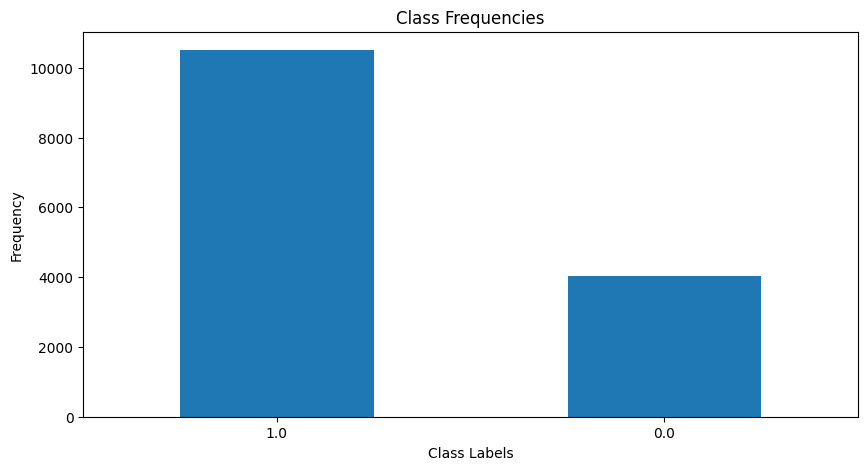

In [7]:
fig=plt.figure(figsize=(10,5))
class_frequencies.plot(kind='bar')
plt.title('Class Frequencies')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [8]:
class_proportions = y.value_counts(normalize=True)#Take the percentage of each different class in y
print("Class Proportions (Relative Frequencies):\n", class_proportions)

Class Proportions (Relative Frequencies):
 187
1.0    0.721963
0.0    0.278037
Name: proportion, dtype: float64


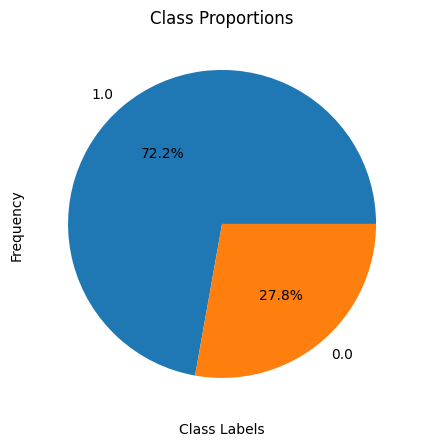

In [9]:
fig=plt.figure(figsize=(10,5))
class_proportions.plot(kind='pie', autopct='%1.1f%%')
plt.title('Class Proportions')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

<h3>5. Train-Validate-Test: </h3>
<ol>
    <li>Dataset Splitting:
        <ul>
            <li>Divide the dataset into three sets: training, validation, and test.</li>
            <li>Common splits are 70-15-15 or 80-10-10.</li>
        </ul>
    </li>
    <li>Model Training:
        <ul>
            <li>Train the model on the training set.</li>
        </ul>
    </li>
    <li>Validation:
        <ul>
            <li>Evaluate the model’s performance on the validation set.</li>
            <li>Tweak hyperparameters based on validation results.</li>
        </ul>
    </li>
    <li>Final Evaluation:
        <ul>
            <li>Assess the model’s performance on the test set for a final unbiased evaluation.</li>
        </ul>
    </li>
</ol>

In [10]:
class ModelResults:
        def __init__(self,modelName=None, accuracy=None, recall=None, precision=None,selectedFeatures=None,featureRanking=None,report=None):
            self.modelName = modelName
            self.accuracy = accuracy
            self.recall = recall
            self.precision = precision
            self.selectedFeatures = selectedFeatures
            self.featureRanking = featureRanking
            self.report = report
        def __toString__(self):
            return f"ModelResults(model name={self.modelName}, accuracy={self.accuracy}, recall={self.recall}, precision={self.precision}, Selected Features={self.selectedFeatures},Feature Ranking={self.featureRanking}\n{self.report})"

In [11]:
def trainAndTestModel(modelName, model):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    print("#######################################")
    print(modelName)
    print("#######################################")
    print("\n")
    
    model_accuracy = 0
    model_recall = np.array([0., 0., 0., 0., 0.])
    model_precision = np.array([0., 0., 0., 0., 0.])
    selected_features,feature_ranking,report=0,0,0
    
    try:
        # Crear RFE y Pipeline
        rfe = RFE(model, n_features_to_select=54)
        pipeline = Pipeline([
            ('feature_selection', rfe),
            ('classification', model)
        ])
        
        # Entrenar el modelo con el pipeline
        pipeline.fit(x_train, y_train)
        
        # Predecir con el modelo entrenado
        y_pred = pipeline.predict(x_test)
        
        # Mostrar las características seleccionadas por RFE
        selected_features = rfe.support_  # Boolean array de las features seleccionadas
        feature_ranking = rfe.ranking_    # Ranking de todas las features
        print("Características seleccionadas (True = seleccionada):", selected_features)
        print("Ranking de las características (1 = seleccionada):", feature_ranking)
        
        # Evaluar el rendimiento del modelo    
        report = classification_report(y_test, y_pred, zero_division=1)  # Aquí se añadió el parámetro zero_division
        print(report)  # Imprimir el classification report
        
        # Calcular los scores de rendimiento
        model_accuracy = accuracy_score(y_test, y_pred)
        model_recall = recall_score(y_test, y_pred, average=None, zero_division=1)
        model_precision = precision_score(y_test, y_pred, average=None, zero_division=1)
        
        print(f"{modelName}, Done Training and testModel")
        print("\n")
        
        return modelName, model_accuracy, model_recall, model_precision,selected_features,feature_ranking, report
    
    except Exception as e:
        print(f"An error occurred during the train-test: {e}")
        return modelName, model_accuracy, model_recall, model_precision,selected_features,feature_ranking, report

In [12]:
models = {
    "SVC": SVC(kernel='linear', C=1.0, class_weight='balanced'),  # Handles class imbalance
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced'),  # Handles class imbalance
    "LogisticRegression": LogisticRegression(C=1.0, solver='liblinear', class_weight='balanced'),  # Handles class imbalance
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=4, class_weight='balanced'),  # Handles class imbalance
    "AdaBoostClassifier": AdaBoostClassifier(n_estimators=50, learning_rate=1.0), # Can be used with a base estimator that handles class imbalance
}

In [ ]:
models_results=[]
for name,model in models.items():
    model_name,model_accuracy, model_recall, model_precision,selected_features,feature_ranking,report=trainAndTestModel(modelName=name,model=model)
    models_results.append(ModelResults(model_name,model_accuracy, model_recall, model_precision,selected_features,feature_ranking,report))

#######################################
SVC
#######################################


Características seleccionadas (True = seleccionada): [False False False False  True  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False  True False  True False False False False
 False False False False False  True False False False False  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False Fal

In [ ]:
for results in models_results:
    print(results.__toString__())